In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as sc
import math

In [24]:
ind = pd.read_csv('./df_result.csv.zip', encoding='latin-1')

/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_68583/2196896351.py:1: DtypeWarning: Columns (99,221,250,260,271,289,292,365,405,529,543,575,611,617,670,680,690,730,740,750,760,770,842,846,883,886,889,895,972,974,976,984,992,1065,1072,1087,1089,1096,1112,1135,1138,1169,1171,1173,1233,1236,1239,1301,1313,1325,1396,1398,1403,1406,1425,1652,1654,1656,1749,1751,1809,1813,1815,1818,1820,1824,1826,1831,1833,1838,1839,1841,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1872,1873,1874,1875,1876,1877,1878,1879,1880,1882,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1909,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1924,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1940,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1957,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973

In [25]:
ind['rebenok']

0        2.0
1        0.0
2        NaN
3        0.0
4        0.0
        ... 
61285    0.0
61286    3.0
61287    0.0
61288    NaN
61289    1.0
Name: rebenok, Length: 61290, dtype: float64

In [26]:
ind = ind[ind.id_w < 2022]

In [27]:
(ind['k11_n_s_r'] == 0).sum()

302

In [28]:
ind['rebenok_yes_no'] = (~ind['rebenok'].isna()) & (ind['rebenok'] > 0)

In [29]:
ind['age'] = ind.id_w - ind.i_h5

In [30]:
ind[['rebenok_yes_no', 'rebenok']]

,rebenok_yes_no,rebenok
0,True,2.0
1,False,0.0
2,False,NaN
3,False,0.0
4,False,0.0
...,...,...
49123,True,2.0
49124,False,0.0
49125,False,0.0
49126,False,0.0


In [31]:
ind["k11_n_s_r"].median()
ind["k11_n_s_r"].quantile(0.97)

80000.0

In [32]:
rebenki = ind[
    (ind["rebenok_yes_no"])
    & (ind["i_h4"] == 2)
    & (ind["k11_n_s_r"] < ind["k11_n_s_r"].quantile(0.97))
]
ne_rebenki = ind[
    (~ind["rebenok_yes_no"])
    & (ind["i_h4"] == 2)
    & (ind["k11_n_s_r"] < ind["k11_n_s_r"].quantile(0.97))
]

In [33]:
ind.i_h4.value_counts()

i_h4
2    28205
1    20923
Name: count, dtype: int64

по всем в зависимости от наличия отсутсвия ребенка

In [34]:
print(rebenki['k11_n_s_r'].dropna().mean(), rebenki['k11_n_s_r'].dropna().median())
print(ne_rebenki['k11_n_s_r'].dropna().mean(), ne_rebenki['k11_n_s_r'].dropna().median())
print(sc.mannwhitneyu(rebenki['k11_n_s_r'].dropna(), ne_rebenki['k11_n_s_r'].dropna()))

18438.294894817856 15000.0
18494.552657731285 15000.0
MannwhitneyuResult(statistic=23463764.5, pvalue=0.10200768699019469)


In [35]:
for age in range(19, 40):
    print(f"###{age}###")
    # if rebenki[rebenki.id_w - rebenki.i_h5 == age].shape[0] == 0 or 
    print(
        rebenki[rebenki.id_w - rebenki.i_h5 == age]["k11_n_s_r"].mean(),
        rebenki[rebenki.id_w - rebenki.i_h5 == age]["k11_n_s_r"].median(),
    )
    print(
        ne_rebenki[ne_rebenki.id_w - ne_rebenki.i_h5 == age]["k11_n_s_r"].mean(),
        ne_rebenki[ne_rebenki.id_w - ne_rebenki.i_h5 == age]["k11_n_s_r"].median(),
    )
    print(
        sc.mannwhitneyu(
            rebenki[rebenki.id_w - rebenki.i_h5 == age]["k11_n_s_r"].dropna(),
            ne_rebenki[ne_rebenki.id_w - ne_rebenki.i_h5 == age]["k11_n_s_r"].dropna(),
        )
    )

###19###
10000.0 10000.0
14900.0 13500.0
MannwhitneyuResult(statistic=10.0, pvalue=0.4978602391785205)
###20###
12375.0 11750.0
15532.727272727272 15000.0
MannwhitneyuResult(statistic=90.5, pvalue=0.5653134577873544)
###21###
8028.571428571428 7300.0
17030.434782608696 15000.0
MannwhitneyuResult(statistic=134.5, pvalue=0.010595076916025617)
###22###
12343.333333333334 10000.0
17832.57251908397 16000.0
MannwhitneyuResult(statistic=754.5, pvalue=0.013402346898508749)
###23###
13717.631578947368 10500.0
18897.349206349205 16000.0
MannwhitneyuResult(statistic=2317.5, pvalue=0.0005564019733665205)
###24###
13128.421052631578 10000.0
19858.536585365855 17500.0
MannwhitneyuResult(statistic=2771.5, pvalue=4.683210888888957e-06)
###25###
15379.166666666666 13000.0
20768.67816091954 18000.0
MannwhitneyuResult(statistic=7298.5, pvalue=1.1423609203838492e-05)
###26###
11590.346534653465 10000.0
21048.198757763974 18000.0
MannwhitneyuResult(statistic=4125.0, pvalue=1.8845970538389777e-11)
###27###


In [36]:
for age in range(19, 40, 5):
    print(f"### ({age}; {age+5}] ###")
    # if rebenki[rebenki.id_w - rebenki.i_h5 == age].shape[0] == 0 or 
    print(
        rebenki[(age < rebenki.age) & (rebenki.age <= age + 5)]["k11_n_s_r"].mean(),
        rebenki[(age < rebenki.age) & (rebenki.age <= age + 5)]["k11_n_s_r"].median(),
    )
    print(
        ne_rebenki[(age < ne_rebenki.age) & (ne_rebenki.age <= age + 5)]["k11_n_s_r"].mean(),
        ne_rebenki[(age < ne_rebenki.age) & (ne_rebenki.age <= age + 5)]["k11_n_s_r"].median(),
    )
    print(
        sc.mannwhitneyu(
            rebenki[(age < rebenki.age) & (rebenki.age <= age + 5)]["k11_n_s_r"].dropna(),
            ne_rebenki[(age < ne_rebenki.age) & (ne_rebenki.age <= age + 5)]["k11_n_s_r"].dropna(),
        )
    )

### (19; 24] ###
12882.822580645161 10000.0
18360.643423137877 16000.0
MannwhitneyuResult(statistic=24987.0, pvalue=1.844224446946686e-10)
### (24; 29] ###
15694.781746031746 14000.0
21757.02806122449 20000.0
MannwhitneyuResult(statistic=204022.0, pvalue=3.165495204606828e-26)
### (29; 34] ###
17635.008944543828 15000.0
21995.58882235529 19000.0
MannwhitneyuResult(statistic=216960.5, pvalue=3.7756595445515864e-13)
### (34; 39] ###
19266.94704528012 17000.0
20724.697885196376 18000.0
MannwhitneyuResult(statistic=194681.0, pvalue=0.006184648748692934)
### (39; 44] ###
19890.15855457227 17500.0
19758.869346733667 17750.0
MannwhitneyuResult(statistic=264628.0, pvalue=0.5567591598456388)


<Axes: xlabel='age'>

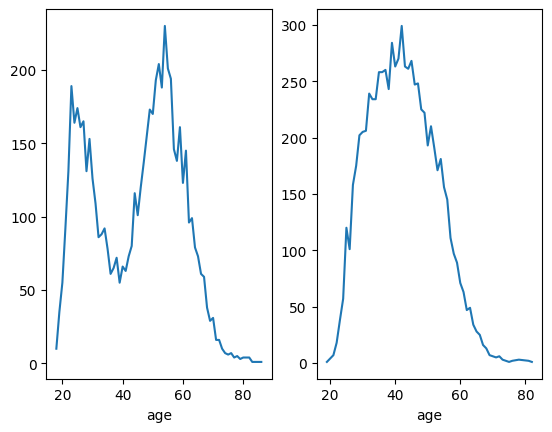

In [48]:
fig, ax = plt.subplots(1, 2)
ne_rebenki.groupby('age')['k11_n_s_r'].count().plot(ax=ax[0])
rebenki.groupby("age")["k11_n_s_r"].count().plot(ax=ax[1])

In [39]:
rebenki['i_h5']

0        1968
7        1962
11       1957
15       1962
20       1980
         ... 
49084    1978
49086    1981
49100    1979
49103    1980
49111    1973
Name: i_h5, Length: 7796, dtype: int64

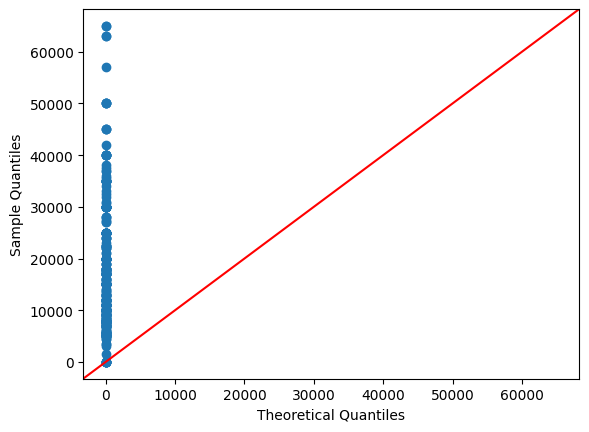

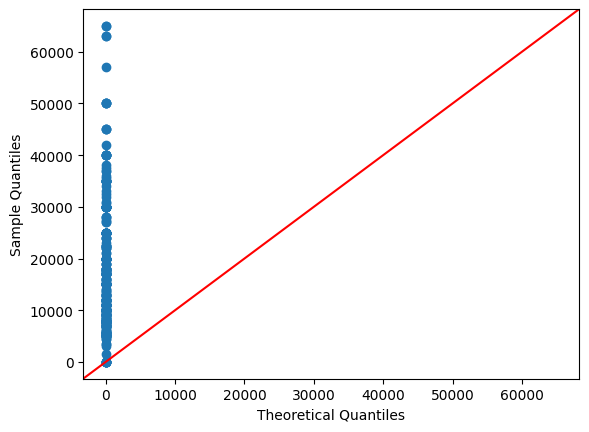

In [40]:
sm.qqplot(rebenki['k11_n_s_r'].sample(300), line='45')

In [41]:
ind.id_w.unique()

array([2013, 2015, 2018, 2020])

<Axes: ylabel='Density'>

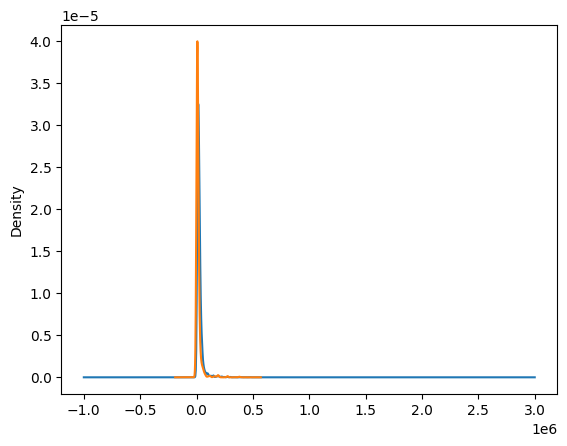

In [42]:
ind.k11_n_s_r.plot(kind='kde')
ind['k28_n_s_r'].plot(kind='kde')

In [43]:
ind.k11_n_s_r[~ind.k11_n_s_r.isna()].count()

26068

In [44]:
ind.k28_n_s_r[~ind.k28_n_s_r.isna()].count()

841

In [45]:
ind['c1_25']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
49123   NaN
49124   NaN
49125   NaN
49126   NaN
49127   NaN
Name: c1_25, Length: 49128, dtype: float64

In [46]:
cpi = pd.DataFrame(
    {
        "cpi": {
            2010: 1.088,
            2011: 1.061,
            2012: 1.066,
            2013: 1.065,
            2014: 1.114,
            2015: 1.129,
            2016: 1.054,
            2017: 1.025,
            2018: 1.043,
            2019: 1.03,
            2020: 1.049,
            2021: 1.084,
            2022: 1.119,
        }
    }
)
for y in range(cpi.index.max() - 1, cpi.index.min(), -1):
    cpi.at[y, "cpi"] = cpi.at[y, "cpi"] * cpi.at[y + 1, "cpi"]
ind['k11'] = ind.apply(lambda x: cpi.at[x.id_w, 'cpi'] * x.k11_r, axis=1)

In [49]:
ind.k11_real

AttributeError: 'DataFrame' object has no attribute 'k11_real'

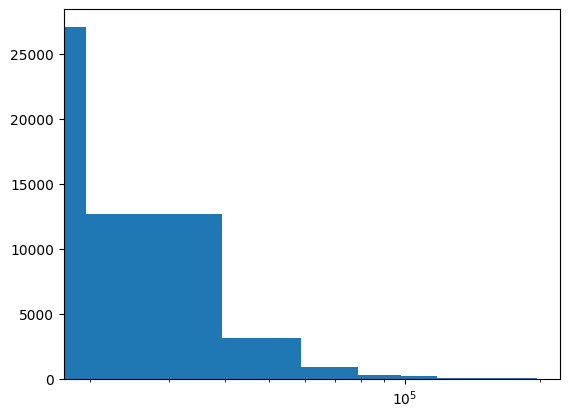

In [ ]:
salaries = ind.k66_r
fig, ax = plt.subplots()
ax.hist(salaries[salaries < 200000])
ax.set_xscale('log')

<Axes: ylabel='Density'>

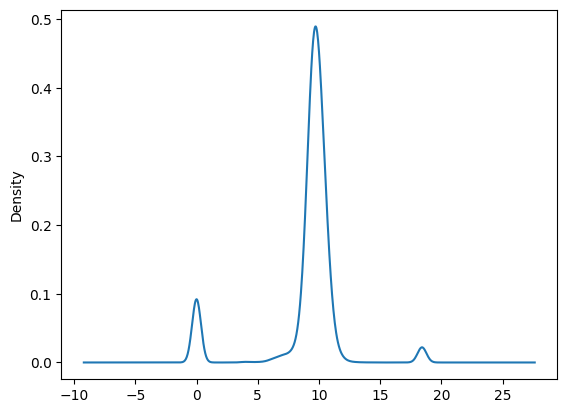

In [ ]:
salaries[~salaries.isnull()].dropna().astype(int).apply(lambda x: math.log(x) if x != 0 else 0).plot(kind='kde')

In [ ]:
cpi = pd.DataFrame(
    {
        "cpi": {
            2010: 1.088,
            2011: 1.061,
            2012: 1.066,
            2013: 1.065,
            2014: 1.114,
            2015: 1.129,
            2016: 1.054,
            2017: 1.025,
            2018: 1.043,
            2019: 1.03,
            2020: 1.049,
        }
    }
)
for y in range(cpi.index.max() - 1, cpi.index.min(), -1):
    cpi.at[y, "cpi"] = cpi.at[y, "cpi"] * cpi.at[y + 1, "cpi"]
ind["k66"] = ind.apply(lambda x: cpi.at[x.id_w, "cpi"] * x.k66_r, axis=1)

,cpi
2010,1.088000
2011,1.844433
2012,1.738391
2013,1.630761
2014,1.531231
2015,1.374534
2016,1.217479
2017,1.155103
2018,1.126930
2019,1.080470
